In [2]:
### import libraries

import numpy as np
from sklearn.metrics.pairwise import cosine_distances,cosine_similarity,euclidean_distances
from sklearn.datasets import load_iris
from importlib import reload
import matplotlib.pyplot as plt

In [3]:
### load iris data_set

data_set = load_iris()

X = data_set.data

Y = data_set.target

print('Data-set info:')

print(np.info(X))

Data-set info:
class:  ndarray
shape:  (150, 4)
strides:  (32, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x558197b449c0
byteorder:  little
byteswap:  False
type: float64
None


# Testing distances

In [3]:
### calculing pi_caculator cumulative proximity

UN, W = X.shape

Xnorm = np.matrix(np.sqrt(np.sum(np.power(X,2),axis=1))).T
aux2 = Xnorm

for i in range(W-1):
    aux2 = np.insert(aux2,0,Xnorm.T,axis=1)

X1 = X / aux2
AA2 = np.mean(X1,0)
X2 = 1
DT2 = X2 - np.sum(np.power(AA2,2))
aux = []
for i in range(UN): aux.append(AA2)
aux2 = [X1[i]-aux[i] for i in range(UN)]
pi_caculator_prox = np.sum(np.sum(np.power(aux2,2),axis=1),axis=1)+DT2

In [4]:
### calculing hand_dist cumulative proximity

L, W = X.shape
distance = np.zeros((L,L))

for i in range(L):
    for j in range(L):

        dot = 0
        denom_a = 0
        denom_b = 0

        for k in range(W):

            dot += (X[i,k]*X[j,k])
            denom_a += X[i,k]**2
            denom_b += X[j,k]**2

        cos_similarity = dot / ((denom_a ** 0.5) * (denom_b ** 0.5))

        distance[i,j] = 1 - cos_similarity

hand_dist_prox = np.sum(distance**2,axis=1)

In [5]:
### calculing cosine_distance cumulative proximity

distance = cosine_distances(X)

cosine_distance_prox = np.sum(distance**2,axis=1)

In [6]:
### calculing cosine_similarity cumulative proximity

distance = cosine_similarity(X)

cosine_similarity_prox = np.sum(distance**2,axis=1)

In [7]:
### calculing euclidean_distance cumulative proximity

distance = euclidean_distances(X)

euclidean_distance_prox = np.sum(distance**2,axis=1)

In [8]:
### comparing pi_caculator with cosine_distance

diff = cosine_distance_prox - pi_caculator_prox

print('difference = {:.2e} +/- {:.2e}'.format(np.mean(diff),np.std(diff)))

difference = 5.60e-01 +/- 2.91e-01


In [9]:
### comparing pi_caculator with cosine_similarity

diff = cosine_similarity_prox - pi_caculator_prox

print('difference = {:.2e} +/- {:.2e}'.format(np.mean(diff),np.std(diff)))

difference = 1.37e+02 +/- 4.50e+00


In [10]:
### comparing hand_dist with cosine_similarity

diff = cosine_similarity_prox - hand_dist_prox

print('difference = {:.2e} +/- {:.2e}'.format(np.mean(diff),np.std(diff)))

difference = 1.37e+02 +/- 4.78e+00


In [11]:
### comparing hand_dist with cosine_distance

diff = cosine_distance_prox - hand_dist_prox

print('difference = {:.2e} +/- {:.2e}'.format(np.mean(diff),np.std(diff)))

difference = 3.18e-16 +/- 1.08e-15


In [12]:
### defining new pi calculator

def pi_calculator(Uniquesample, mode):
    
    '''
    # Cumulative Proximity in recursive version
    # Section 2.2.i of SODA
    '''
    
    if mode == 'euclidean':

        L, W = Uniquesample.shape
        distance = np.zeros((L))

        uspi = []

        for i in range(L):

            for j in range(L):

                norm = 0

                for k in range(W): norm += (Uniquesample[i,k]-Uniquesample[j,k])**2

                euclidean_distance = norm**0.5

                distance[j] = euclidean_distance

            uspi.append(np.sum(distance**2,axis=0))


    if mode == 'cosine':

        L, W = Uniquesample.shape
        distance = np.zeros((L))

        uspi = []

        for i in range(L):

            for j in range(L):

                dot = 0
                denom_a = 0
                denom_b = 0

                for k in range(W):

                    dot += (Uniquesample[i,k]*Uniquesample[j,k])
                    denom_a += Uniquesample[i,k]**2
                    denom_b += Uniquesample[j,k]**2

                cos_similarity = dot / ((denom_a ** 0.5) * (denom_b ** 0.5))

                distance[j] = 1 - cos_similarity

            uspi.append(np.sum(distance**2,axis=0))
        
    return uspi

In [13]:
### testing new function 

ld1 = pi_calculator(X,'euclidean')

ld2 = pi_calculator(X,'cosine')

diff1 = euclidean_distance_prox - ld1

print('difference = {:.2e} +/- {:.2e}'.format(np.mean(diff1),np.std(diff1)))

diff2 = cosine_distance_prox - ld2

print('difference = {:.2e} +/- {:.2e}'.format(np.mean(diff1),np.std(diff1)))

difference = 5.38e-13 +/- 7.22e-13
difference = 5.38e-13 +/- 7.22e-13


# Testing SODA modifications

In [4]:
reload(SODA_numba)

NameError: name 'SODA_numba' is not defined

In [4]:
import SODA_numba

SODA_input = {
    'StaticData' : X,
    'GridSize' : 5,
    'DistanceType' : 'euclidean'
}

output = SODA_numba.SelfOrganisedDirectionAwareDataPartitioning(SODA_input)

target = np.array(output['IDX'])

In [53]:
np.unique(target)

array([1, 2])

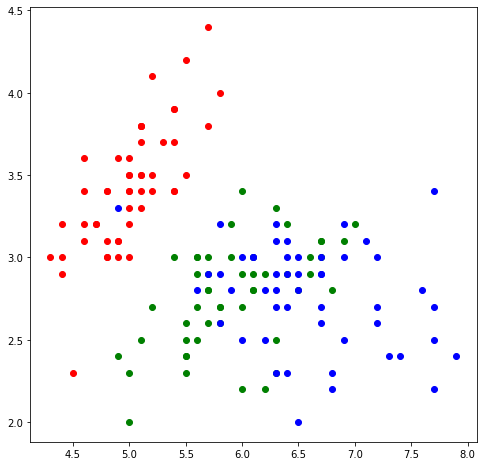

In [49]:
plt.figure(figsize=(8, 8))

plt.scatter(X[Y==0,0],X[Y==0,1],color='r')
plt.scatter(X[Y==1,0],X[Y==1,1],color='g')
plt.scatter(X[Y==2,0],X[Y==1,1],color='b')

plt.show()

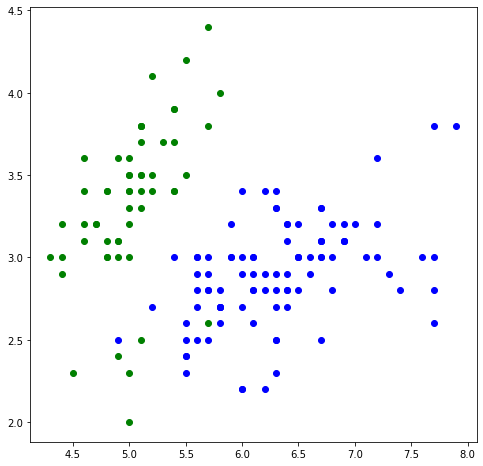

In [56]:
plt.figure(figsize=(8, 8))

plt.scatter(X[target==1,0],X[target==1,1],color='g')
plt.scatter(X[target==2,0],X[target==2,1],color='b')

plt.show()